In [45]:
%matplotlib inline

# A-SOUL直播观众数据分析
## 1. 介绍
本Jupyter Notebok旨在对提取出来的用户弹幕数据进行统计分析，并制作数据可视化。
本分析仅供娱乐，未考虑抽奖号、自动签到脚本等底噪条件的影响。
## 2. 数据导入与预处理
### 2.1 原始数据导入

In [1]:
import json
import os
with open("./output.txt") as f:
    data = json.load(f)

### 2.2 数据预处理
将json格式的数据转换为pandas dataframe，并输出为csv文件。

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.DataFrame(data).transpose()
df['uid'] = df.index
df = df[['uid', 'first_seen', 'last_seen', 'stream_count', 'comment_count']]
df['first_seen'] = pd.to_datetime(df['first_seen'], format="%Y.%m.%d")
df['last_seen'] = pd.to_datetime(df['last_seen'], format="%Y.%m.%d")

In [4]:
df.to_csv('output_chart.csv')

## 3. 数据分析与可视化
A-SOUL观众的划分依据是什么？有人会说是看过直播就是A-SOUL观众，有人会说看很多场直播、发很多弹幕乃至打了米才算A-SOUL观众。而本次分析中使用的依据是：看过10场以上A-SOUL直播。该标准来自A-SOUL在2023年7月BW线下活动活动时提出的一个问题“看过10场A-SOUL直播的观众请举手”。
基于这一标准，保留下来的“A-SOUL观众”的标准是：stream_count >= 10。由于stream_count仅在某uid在某场直播有过至少1条被记录下的弹幕时才会为这一uid加1，因此这一标准会筛选掉以下类型的A-SOUL粉丝：
- 不看A-SOUL直播的粉丝
- 看A-SOUL直播却不发弹幕的粉丝
- 看A-SOUL直播少于10场的粉丝
- 看A-SOUL直播场数多于10场，但被记录到有弹幕的场次少于10场

对于最后一种粉丝，应当注意到：看A-SOUL直播足够多（远大于10场）的粉丝即使有少数直播内发的弹幕没有被记录到，累积的stream_count也会超过10。所以可以认为这一标准作为筛选标准的偏差是可以被接受的。

In [5]:
audience = df[df['stream_count']>=10]
audience

,uid,first_seen,last_seen,stream_count,comment_count
35811133,35811133,2020-12-11,2021-02-17,13,433
353022,353022,2020-12-11,2023-07-06,631,17925
3286186,3286186,2020-12-11,2021-12-16,42,2427
492143069,492143069,2020-12-11,2023-07-06,747,90534
8549831,8549831,2020-12-11,2022-10-02,94,2294
...,...,...,...,...,...
17564942,17564942,2023-04-14,2023-06-25,13,49
96981687,96981687,2023-04-14,2023-06-17,20,36
1643154379,1643154379,2023-05-04,2023-06-29,11,57
259260398,259260398,2023-05-04,2023-06-25,11,23


In [122]:
audience[audience['first_seen'] >= pd.Timestamp(2021, 5, 10, 0)]

,uid,first_seen,last_seen,stream_count,comment_count
86706552,86706552,2021-06-02,2022-06-12,238,3294
26504714,26504714,2021-06-14,2022-05-30,29,396
168044166,168044166,2021-07-18,2023-02-03,214,3083
39137162,39137162,2021-06-24,2022-05-30,101,957
25716565,25716565,2022-01-19,2022-06-02,91,1540
...,...,...,...,...,...
17564942,17564942,2023-04-14,2023-06-25,13,49
96981687,96981687,2023-04-14,2023-06-17,20,36
1643154379,1643154379,2023-05-04,2023-06-29,11,57
259260398,259260398,2023-05-04,2023-06-25,11,23


在去除掉看A-SOUL直播少于10场的UID后，还剩余120350个UID。以下数据分析过程中如无特殊声明，"A-SOUL观众"等类似词汇默认指代这一部分B站用户。
#### 3.1 A-SOUL观众整体分析
##### 3.1.1 A-SOUL观众 入坑时间分析
入坑时间在这里指的是发出第一条弹幕的时间，即first_seen一列。对这一列进行可视化与统计分析：

In [6]:
first_seen_months = []
for first_seen_month in audience['first_seen']:
    first_seen_months.append(first_seen_month.strftime('%Y-%m'))

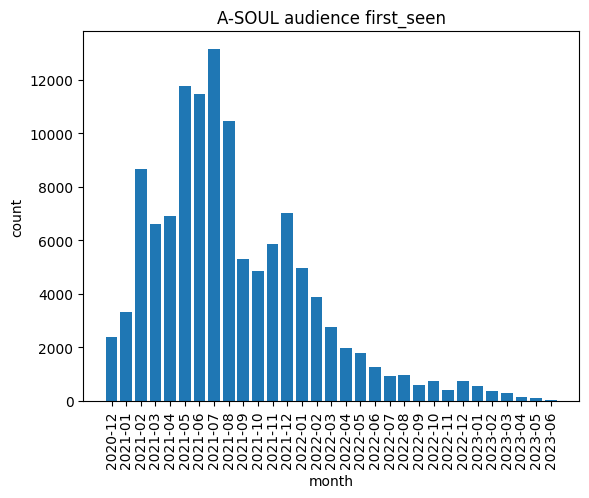

In [7]:
from collections import Counter

def create_bar_plot(data_list, title, xlabel, ylabel):
    # Count the occurrences of each value in the list
    occurrences = dict(Counter(data_list))
    # Sort keys
    dicKeys = list(occurrences.keys())
    dicKeys.sort()
    sorted_occurrences = {i: occurrences[i] for i in dicKeys}

    # Get the unique values and their corresponding occurrences
    unique_values = list(sorted_occurrences.keys())
    occurrences_count = list(sorted_occurrences.values())
    
    # Create a bar plot
    plt.bar(unique_values, occurrences_count)

    # Add labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation = 90)
    # Show the plot
    plt.show()
create_bar_plot(first_seen_months, "A-SOUL audience first_seen","month", "count")

#### 3.1.2. A-SOUL观众退坑时间分析


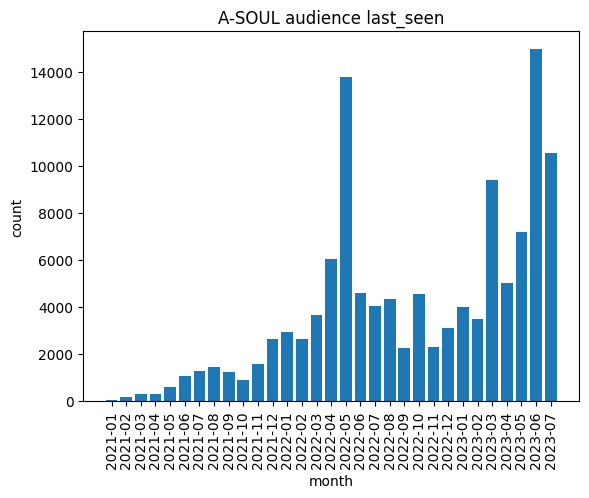

In [10]:
last_seen_months = []
for last_seen_month in audience['last_seen']:
    last_seen_months.append(last_seen_month.strftime('%Y-%m'))
create_bar_plot(last_seen_months, "A-SOUL audience last_seen","month", "count")

该图中，每月的柱代表了最后一次弹幕在当月的A-SOUL观众总量。对该图表的解读：
- 因数据的选取范围到2023年7月初，最后的两根柱子可认为是“截止至2023年7月初还在继续观看A-SOUL直播的观众”总量
- 除最后两根柱子外，其他可认为是不再继续观看A-SOUL直播的观众数。最显著的两个高峰在2023年5月，其次是2023年3月。


Timestamp('2023-07-06 00:00:00')

#### 3.1.3. A-SOUL观众弹幕量分析
弹幕量累积分布折线图

In [42]:
nrow = len(audience.index)
cap1,cap2,cap3 = 0,0,0
for i in range(max(audience['comment_count'])):
    if list(audience['comment_count']>i).count(True) / nrow <= 0.1:
        print(f"90%的观众发过大于等于{i}条弹幕")
        cap1=i
        break
for i in range(cap1, max(audience['comment_count'])):
    if list(audience['comment_count']>i).count(True) / nrow <= 0.05:
        print(f"95%的观众发过大于等于{i}条弹幕")
        cap2=i
        break
for i in range(cap2, max(audience['comment_count'])):
    if list(audience['comment_count']>i).count(True) / nrow <= 0.01:
        print(f"99%的观众发过大于等于{i}条弹幕")
        cap3=i
        break

90%的观众发过大于等于1020条弹幕
95%的观众发过大于等于2004条弹幕
99%的观众发过大于等于6813条弹幕


- 90%的观众发过大于等于1020条弹幕
- 95%的观众发过大于等于2004条弹幕
- 99%的观众发过大于等于6813条弹幕

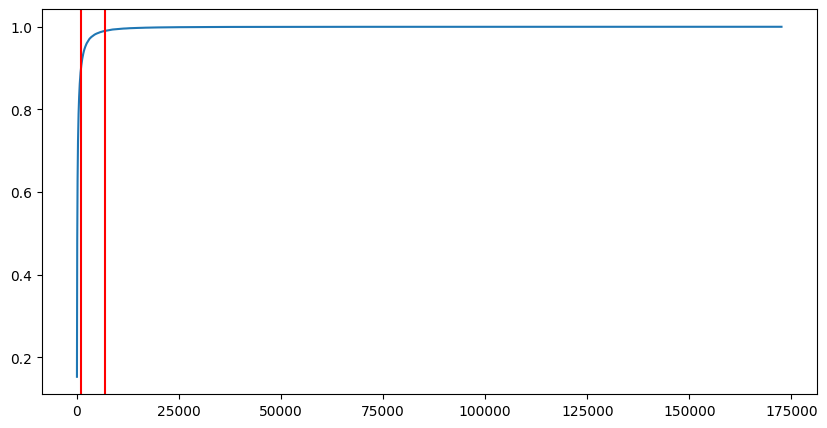

In [54]:
count, bins_count = np.histogram(audience['comment_count'], bins=10000)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf)
plt.axvline(x=cap1, color = 'r')
plt.axvline(x=cap3, color = 'r')
plt.rcParams['figure.figsize'] = [15, 8]
plt.show()

### 3.2 510事件后退坑观众分析
#### 3.2.1 对“受510事件影响退坑观众”的定义

In [74]:
around_510 = audience[audience['last_seen'] >= pd.Timestamp(2022, 3, 1, 0)]
around_510 = around_510[around_510['last_seen'] < pd.Timestamp(2022, 10, 1, 0)]

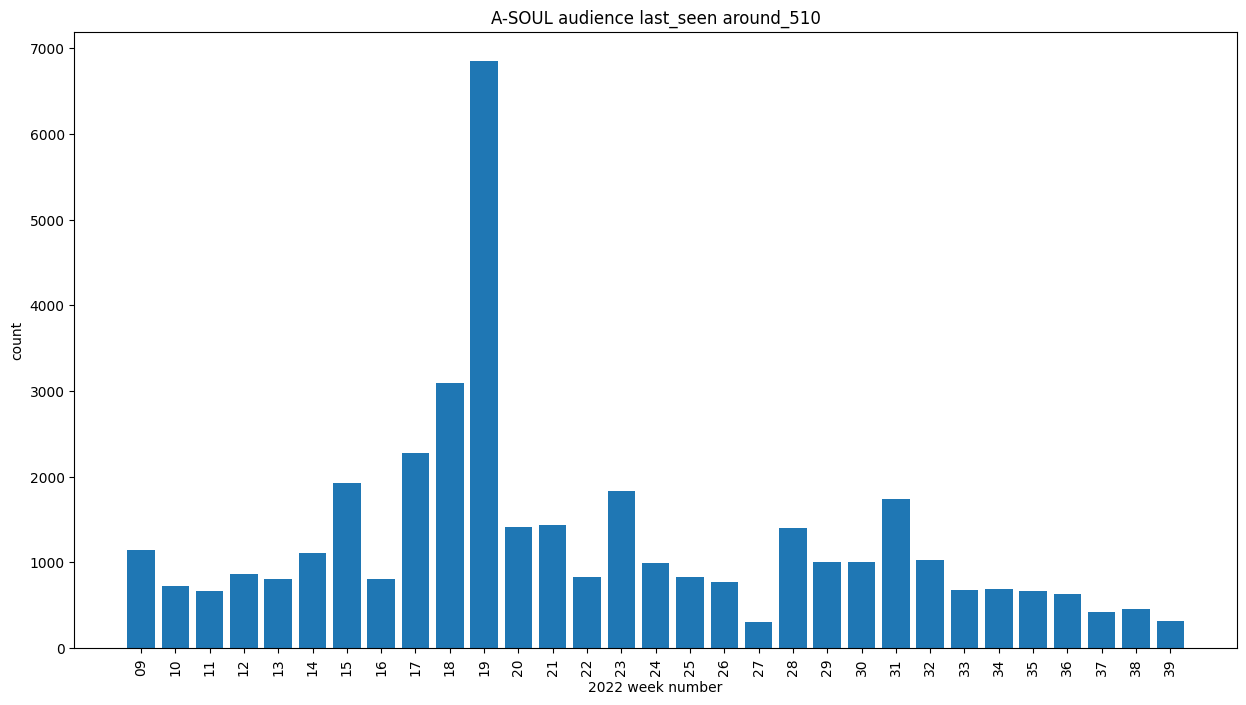

In [75]:
last_seen_weeks = []
for last_seen_week in around_510['last_seen']:
    last_seen_weeks.append(last_seen_week.strftime('%W'))
create_bar_plot(last_seen_weeks, "A-SOUL audience last_seen around_510","2022 week number", "count")

2022年第18周为5月2日至5月8日，第19周为5月9日至5月15日。可以看到：最后弹幕记录在19周内的A-SOUL观众有一个显著的高峰，而19周之后的几个月内则保持早一个相对稳定的水平。说明在510后，大多数选择退坑的观众是在观看过这一周内的某场直播后选择离开。对18-22周的最后观看记录进行分析：

In [79]:
week18_22 = audience[audience['last_seen'] >= pd.Timestamp(2022, 5, 2, 0)]
week18_22 = week18_22[week18_22['last_seen'] < pd.Timestamp(2022, 6, 5, 0)]

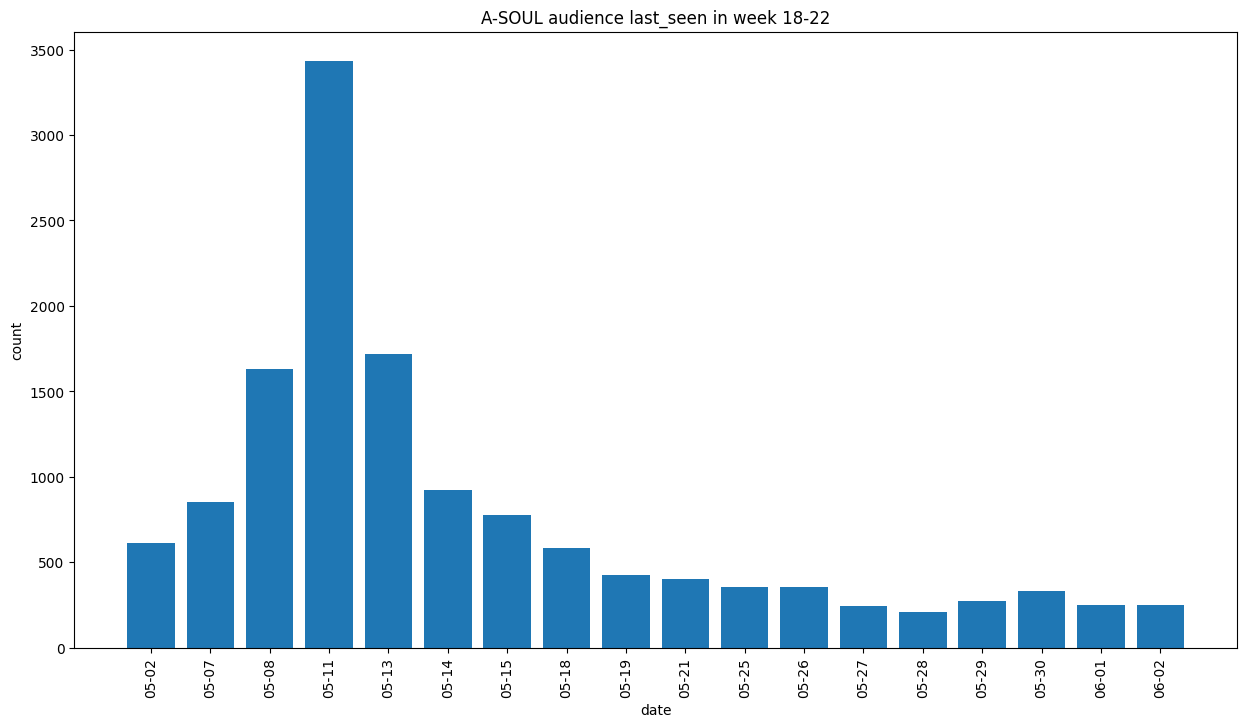

In [80]:
last_seen_days = []
for last_seen_day in week18_22['last_seen']:
    last_seen_days.append(last_seen_day.strftime('%m-%d'))
create_bar_plot(last_seen_days, "A-SOUL audience last_seen in week 18-22","date", "count")

由上图看出，最后由弹幕记录的直播为510公告前最后一场直播、511直播、513直播相对之后的其他周更高。5月8日的较高水平也解释了第18周相也相对较高的现象；而在2022年第19周内的511 513两场直播的柱相对较高，从而导致了第19周相对较高。  
因此，将最后一次弹幕记录在这三场直播内的用户定义为“受510事件影响而离开的A-SOUL观众”是可行的，其中5月8日后不再观看A-SOUL直播的观众可能是“看到510公告后选择不再继续观看AS”，而5月11日、5月13日后不再观看A-SOUL观众应当是直接受到了511直播和后续的一系列事件影响选择不再继续观看直播。相比之下，5月14号直播的退坑人数并未显著大于后续其他周，暂不考虑在内。

In [81]:
quit510 = audience[audience['last_seen'] >= pd.Timestamp(2022, 5, 8, 0)]
quit510 = quit510[quit510['last_seen'] < pd.Timestamp(2022, 5, 13, 0)]
quit510

,uid,first_seen,last_seen,stream_count,comment_count
35738276,35738276,2020-12-15,2022-05-11,218,11806
3127290,3127290,2020-12-12,2022-05-08,270,1667
562642957,562642957,2020-12-12,2022-05-11,281,5717
159081833,159081833,2020-12-15,2022-05-11,35,269
545812687,545812687,2020-12-11,2022-05-11,37,826
...,...,...,...,...,...
2282947,2282947,2022-04-20,2022-05-11,12,208
98566112,98566112,2022-04-22,2022-05-08,10,88
488612,488612,2022-04-22,2022-05-08,10,54
12252495,12252495,2022-04-22,2022-05-11,10,288


In [82]:
quit510.to_csv('quit510.csv')

### 3.2 该部分观众的成分分析
#### 3.2.1 入坑时间分析

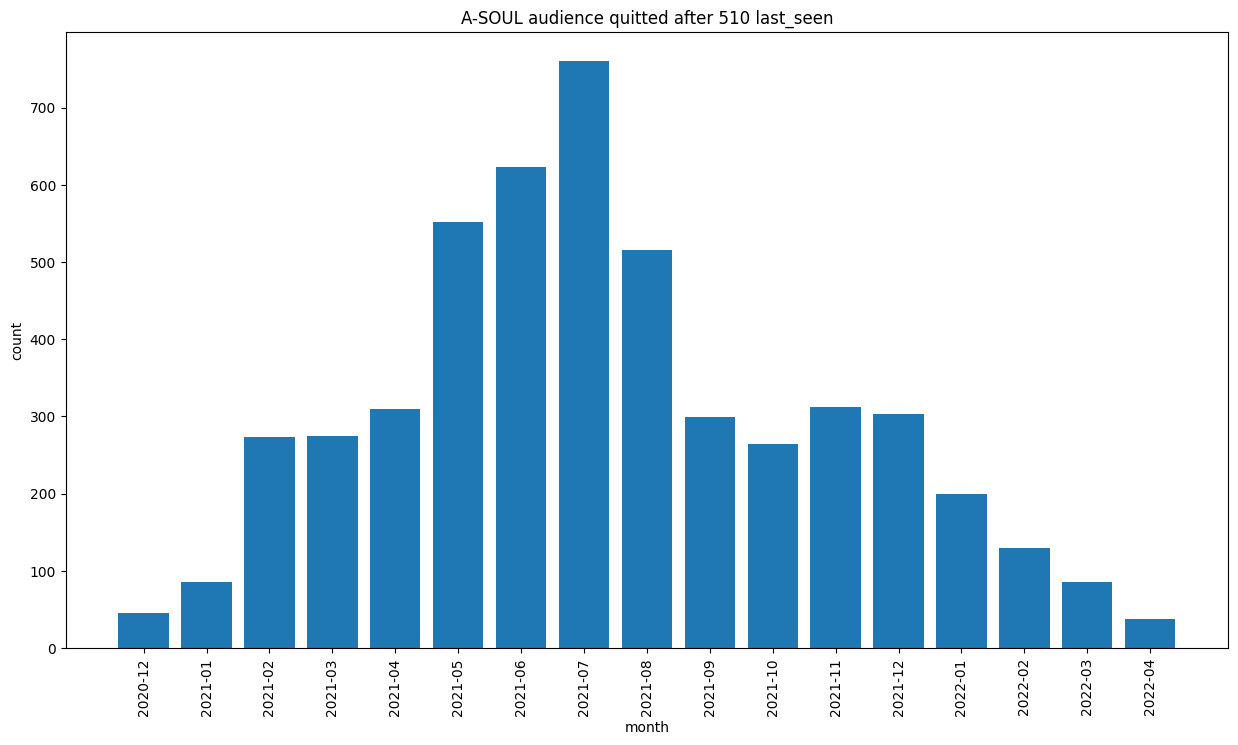

In [85]:
quit510_last_seen_months = []
for last_seen_month in quit510['first_seen']:
    quit510_last_seen_months.append(last_seen_month.strftime('%Y-%m'))
create_bar_plot(quit510_last_seen_months, "A-SOUL audience quitted after 510 last_seen","month", "count")

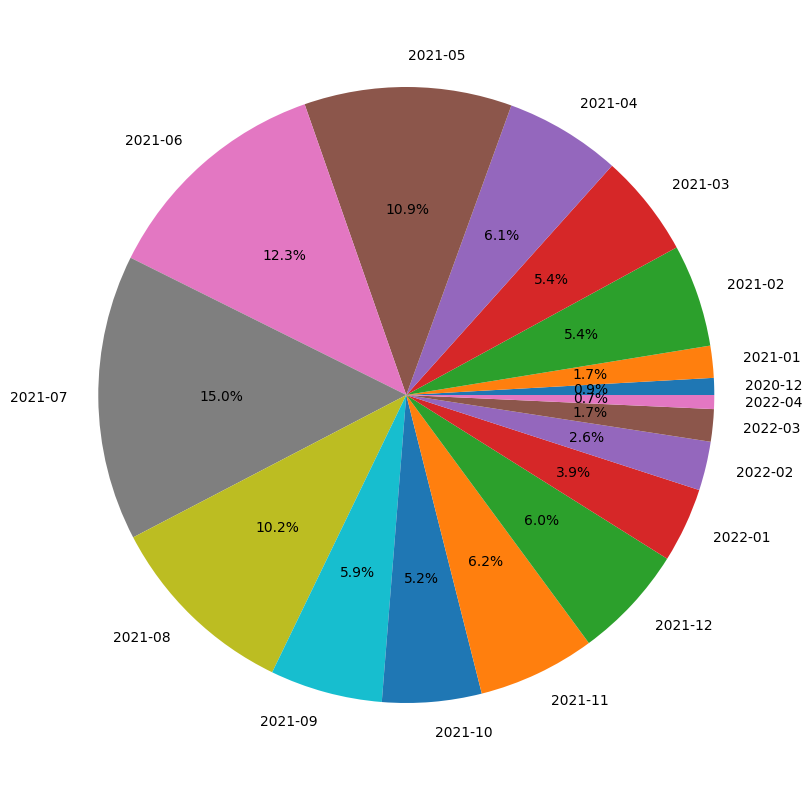

In [111]:

def create_pie_plot(data_list):
    # Count the occurrences of each value in the list
    occurrences = dict(Counter(data_list))
    # Sort keys
    dicKeys = list(occurrences.keys())
    dicKeys.sort()
    sorted_occurrences = {i: occurrences[i] for i in dicKeys}

    # Get the unique values and their corresponding occurrences
    unique_values = list(sorted_occurrences.keys())
    occurrences_count = list(sorted_occurrences.values())
    
    # create pie plot
    fig, ax = plt.subplots()
    ax.pie(occurrences_count, labels=unique_values, autopct='%1.1f%%')

    # Show the plot
    plt.show()

create_pie_plot(quit510_last_seen_months)


由上二图可以看出：
- 受510影响退坑的观众中，最多入坑的三个月分别是2021年7月(15.0%)、2021年6月(12.3%)、2021年5月（10.9%），此外入坑于8月的(10.2%)也较多。
- 受510影响退坑的观众中，在2021年5月前入坑的观众约占19.5%，在2021年5月及以后入坑的观众约占80.5%
### 3.3 退坑观众在A-SOUL观众中的占比
受510事件影响而未退坑的观众则定义为：在2022年5月14日及以后退坑，且入坑时间在2022年5月10日之前。

In [108]:
quit510.index

Index(['35738276', '3127290', '562642957', '159081833', '545812687', '90144',
       '111266329', '5660573', '825456', '12659322',
       ...
       '38431917', '387233079', '406316944', '639606813', '6963963', '2282947',
       '98566112', '488612', '12252495', '296330'],
      dtype='object', length=5067)

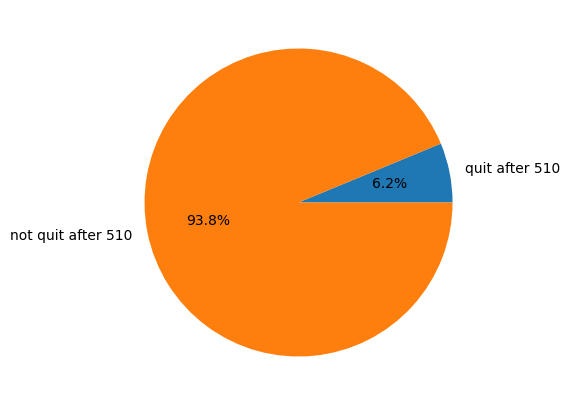

In [116]:
notquit510 = audience[audience['last_seen'] >= pd.Timestamp(2022, 5, 14, 0)]
notquit510 = notquit510[notquit510['first_seen'] < pd.Timestamp(2022, 5, 10, 0)]
# create pie plot
fig, ax = plt.subplots()
ax.pie([len(quit510.index), len(notquit510.index)], labels=["quit after 510", "not quit after 510"], autopct='%1.1f%%')
plt.rcParams['figure.figsize'] = [5,5]
plt.show()


退坑观众在21年5月前入坑的占比：

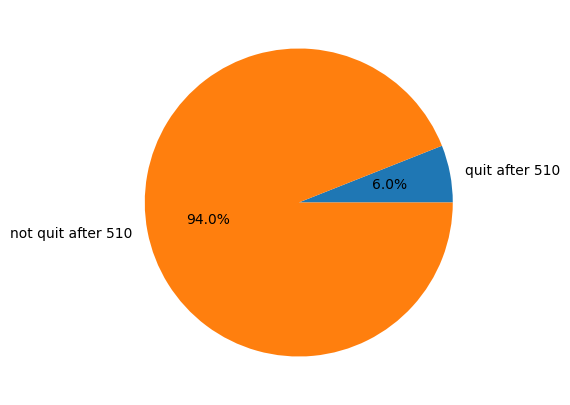

In [117]:

# create pie plot
fig, ax = plt.subplots()
ax.pie([len(quit510[quit510['first_seen'] < pd.Timestamp(2021, 5, 1, 0)].index), len(notquit510[notquit510['first_seen'] < pd.Timestamp(2021, 5, 1, 0)].index)], labels=["quit after 510", "not quit after 510"], autopct='%1.1f%%')
plt.rcParams['figure.figsize'] = [5,5]
plt.show()


21年5月后退坑的在21年5月后入坑却未受影响退坑观众中的占比：

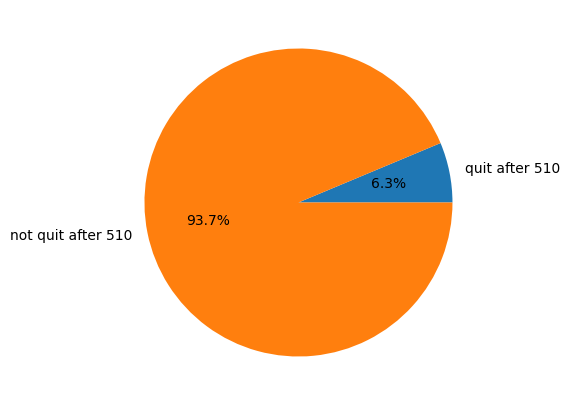

In [118]:
# create pie plot
fig, ax = plt.subplots()
ax.pie([len(quit510[quit510['first_seen'] >= pd.Timestamp(2021, 5, 1, 0)].index), len(notquit510[notquit510['first_seen'] >= pd.Timestamp(2021, 5, 1, 0)].index)], labels=["quit after 510", "not quit after 510"], autopct='%1.1f%%')
plt.rcParams['figure.figsize'] = [5,5]
plt.show()

无论是21年5月前入坑的人的510事件退坑比例，还是21年5月后入坑的人的510事件退坑比例，都是差不多6%

使用从danmakus上爬取的该部分观众的粉丝牌、观看、弹幕、消费记录进行分析：


## 4. 结论